# Telecom Customer Churn

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [10]:
data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [11]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

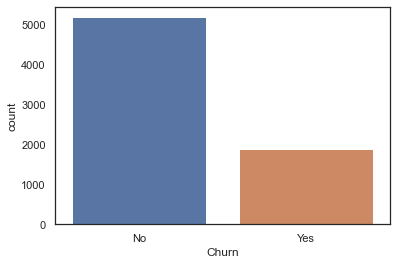

In [14]:
sns.set(style="white", palette="deep", color_codes=True)
sns.despine(left=True)
sns.countplot(data["Churn"]);

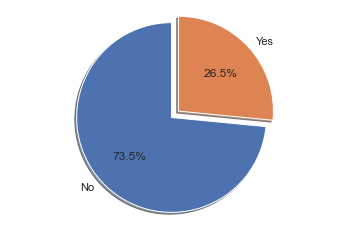

In [15]:
plt.pie(data["Churn"].value_counts(),explode=(0,0.1), autopct='%1.1f%%',
        shadow=True, startangle=90,labels=data["Churn"].unique())
plt.axis('equal') ;


In [16]:
data.query("TotalCharges == ' '").TotalCharges.count()


11

In [17]:
data["TotalCharges"] = data["TotalCharges"].replace(" ",np.nan)
data.dropna(inplace = True);

In [18]:
data["TotalCharges"] = data["TotalCharges"].astype("float")

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [20]:
data[data["TotalCharges"]<0]["TotalCharges"].count()

0

In [21]:

temp_columns = [col for col in data.columns if col not in ("customerID","gender","MonthlyCharges","TotalCharges","Churn")]

In [22]:
temp_columns

['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [23]:
for col in temp_columns:
    print("{} : {}".format(col,data[col].unique()))

SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [24]:
for col in temp_columns:
    if col in ("OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"):
        data[col] = data[col].replace({'No internet service':'No'})

In [25]:
temp_tenure = np.array(data["tenure"].tolist())
print("min: {}".format(temp_tenure.min()))
print("max: {}".format(temp_tenure.max()))

min: 1
max: 72


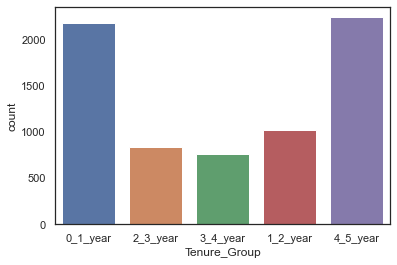

In [26]:
def tenure_to_group(data):
    if data["tenure"] <=12:
        return "0_1_year"
    elif (data["tenure"] > 12) & (data["tenure"] <= 24 ):
        return "1_2_year"
    elif (data["tenure"] > 24) & (data["tenure"] <= 36) :
        return "2_3_year"
    elif (data["tenure"] > 36) & (data["tenure"] <= 48) :
        return "3_4_year"
    elif data["tenure"] > 48 & (data["tenure"] <= 60):
        return "4_5_year"
    elif data["tenure"] > 60 & (data["tenure"] <= 72):
        return "5_6_year"
data["Tenure_Group"] = data.apply(lambda data:tenure_to_group(data),axis = 1)
sns.countplot(data["Tenure_Group"]);

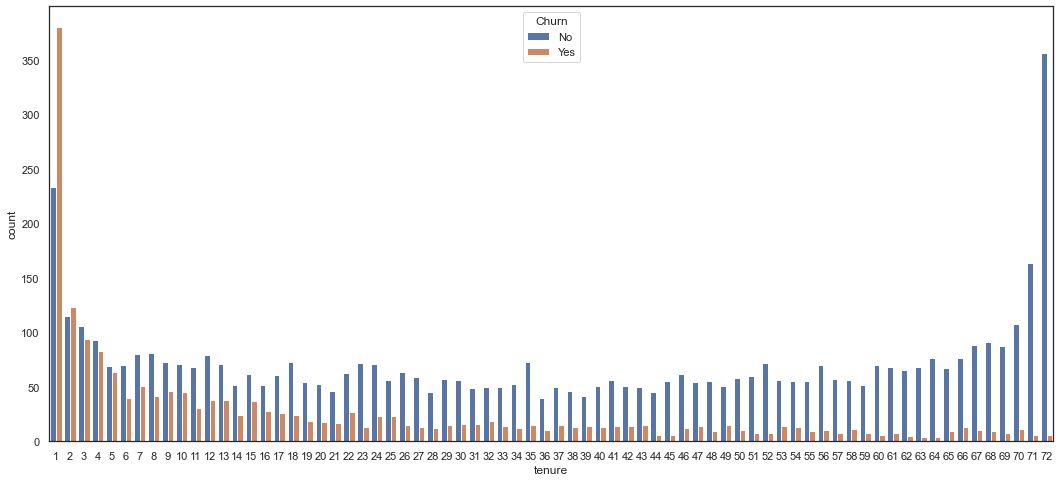

In [27]:
f, axes = plt.subplots(figsize=(18, 8))
sns.countplot(data["tenure"],hue = data["Churn"]);

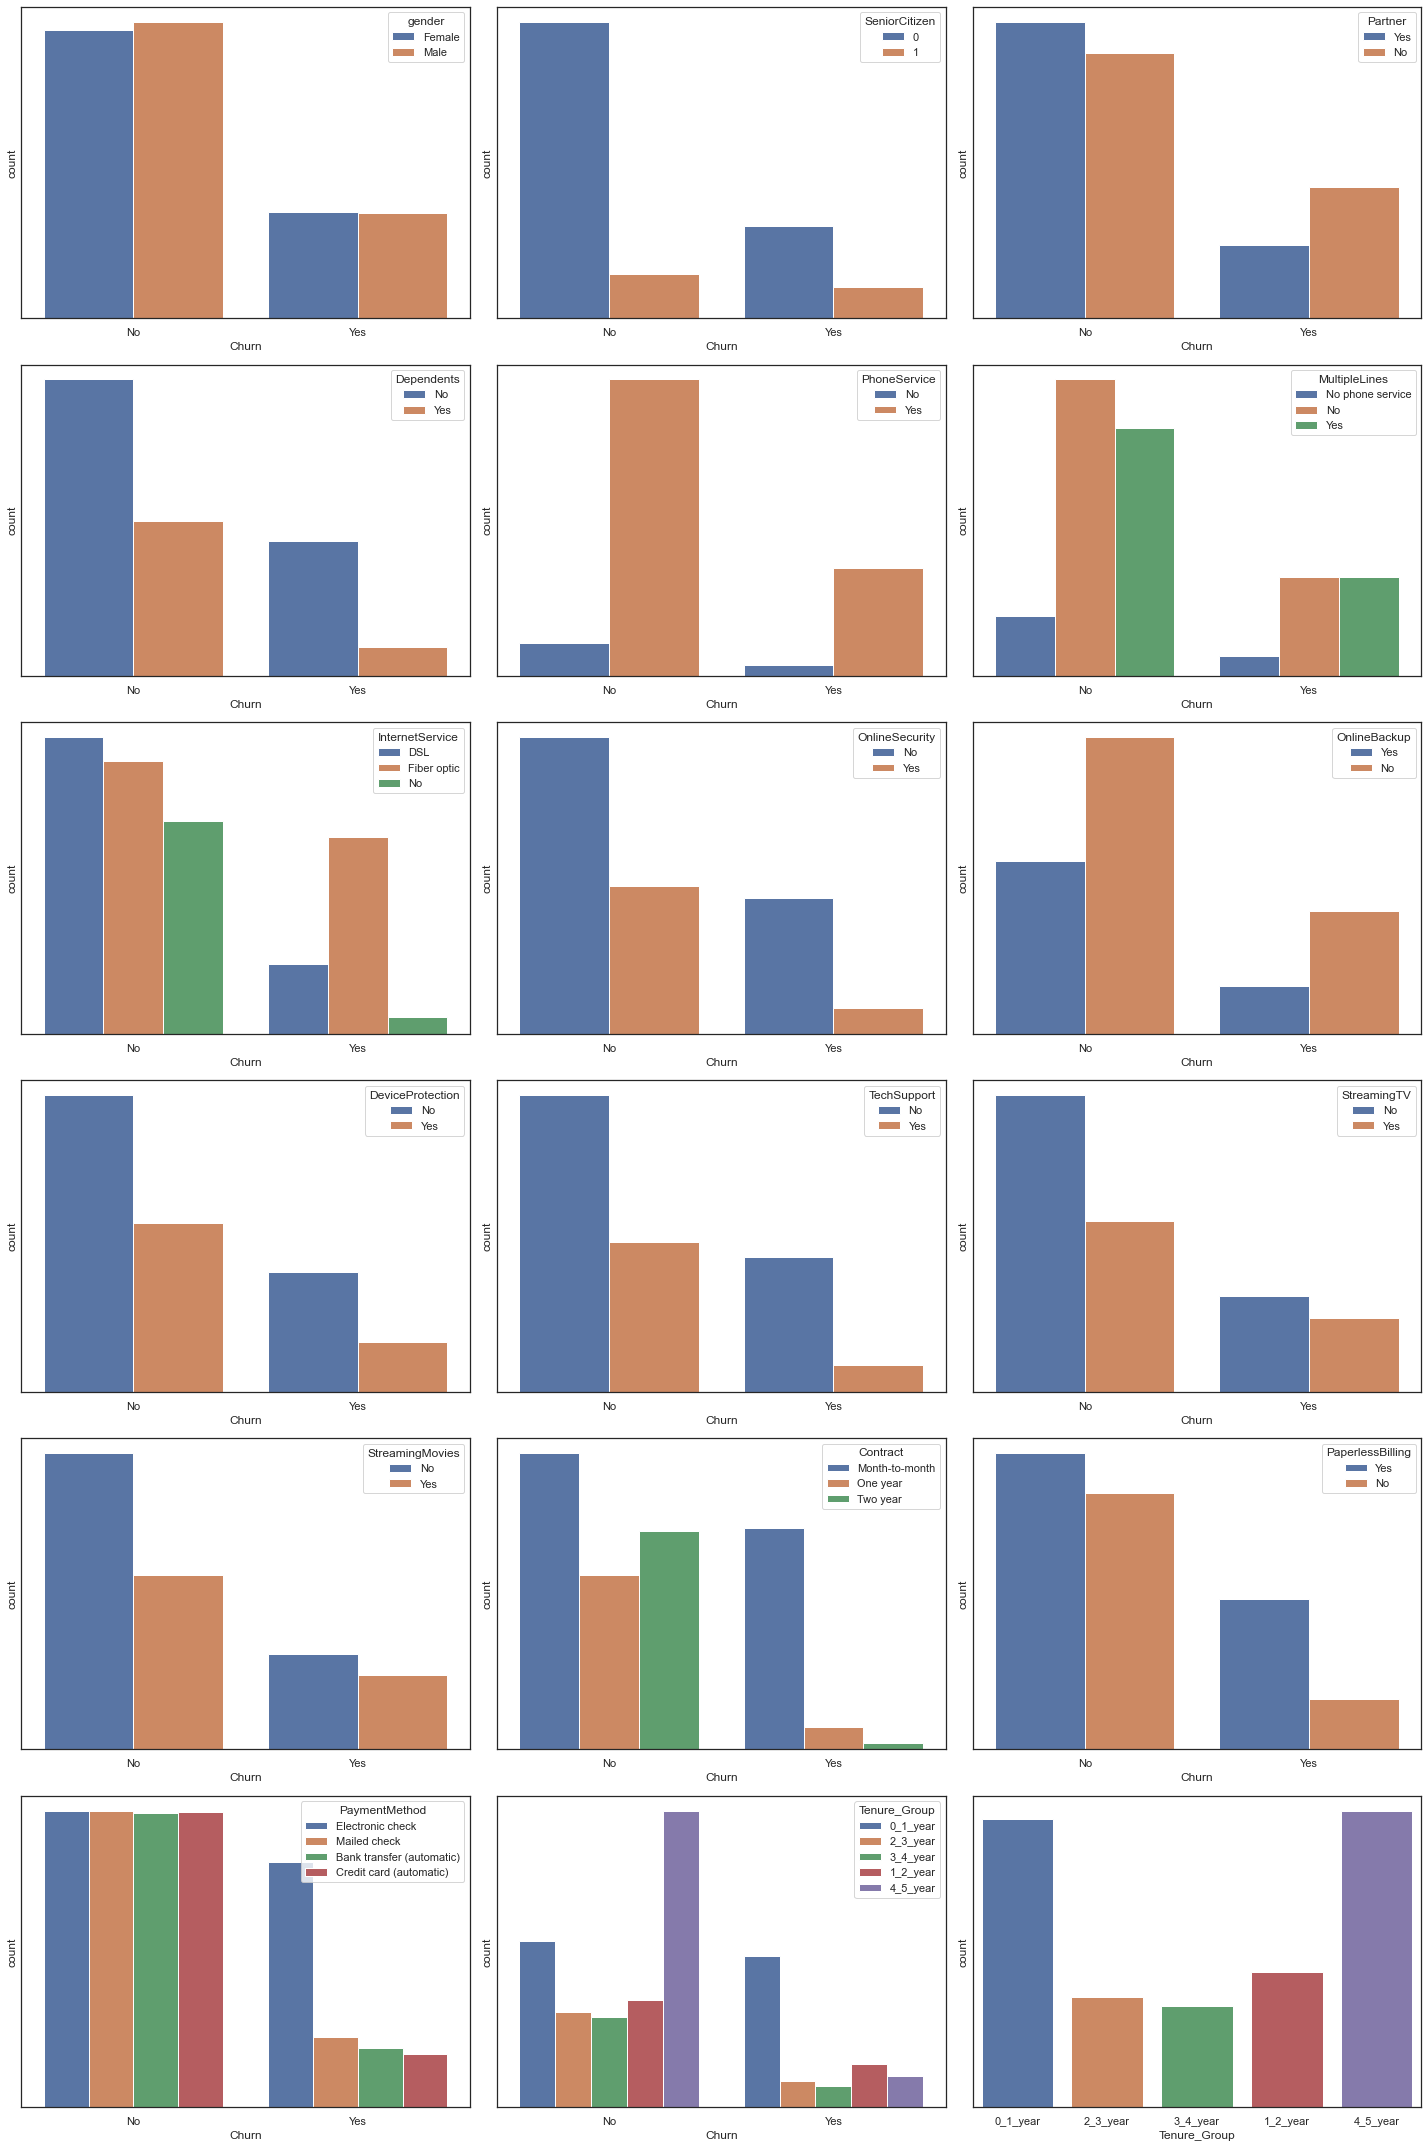

In [28]:
f, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 30))

sns.countplot(data["Churn"],hue = data["gender"],ax = axes[0,0])
sns.countplot(data["Churn"],hue = data["SeniorCitizen"],ax = axes[0,1])
sns.countplot(data["Churn"],hue = data["Partner"],ax = axes[0,2])
sns.countplot(data["Churn"],hue = data["Dependents"],ax = axes[1,0])
sns.countplot(data["Churn"],hue = data["PhoneService"],ax = axes[1,1])
sns.countplot(data["Churn"],hue = data["MultipleLines"],ax = axes[1,2])
sns.countplot(data["Churn"],hue = data["InternetService"],ax = axes[2,0])
sns.countplot(data["Churn"],hue = data["OnlineSecurity"],ax = axes[2,1])
sns.countplot(data["Churn"],hue = data["OnlineBackup"],ax = axes[2,2])
sns.countplot(data["Churn"],hue = data["DeviceProtection"],ax = axes[3,0])
sns.countplot(data["Churn"],hue = data["TechSupport"],ax = axes[3,1])
sns.countplot(data["Churn"],hue = data["StreamingTV"],ax = axes[3,2])
sns.countplot(data["Churn"],hue = data["StreamingMovies"],ax = axes[4,0])
sns.countplot(data["Churn"],hue = data["Contract"],ax = axes[4,1])
sns.countplot(data["Churn"],hue = data["PaperlessBilling"],ax = axes[4,2])
sns.countplot(data["Churn"],hue = data["PaymentMethod"],ax = axes[5,0])
sns.countplot(data["Churn"],hue = data["Tenure_Group"],ax = axes[5,1])
sns.countplot(data["Tenure_Group"],ax = axes[5,2]);

plt.setp(axes, yticks=[])
plt.tight_layout()

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

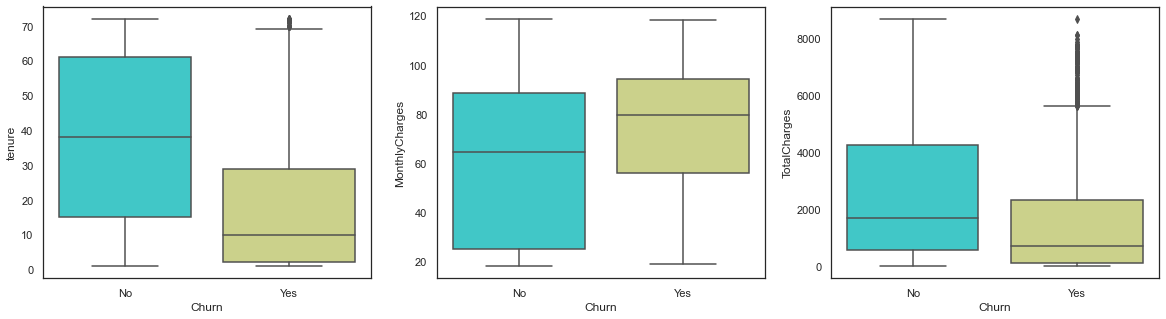

In [29]:
f, axes = plt.subplots( ncols=3, figsize=(20, 5))
sns.boxplot(x="Churn", y="tenure", data=data,palette='rainbow',ax = axes[0]);
sns.boxplot(x="Churn", y="MonthlyCharges", data=data,palette='rainbow',ax = axes[1])
sns.boxplot(x="Churn", y="TotalCharges", data=data,palette='rainbow',ax = axes[2])

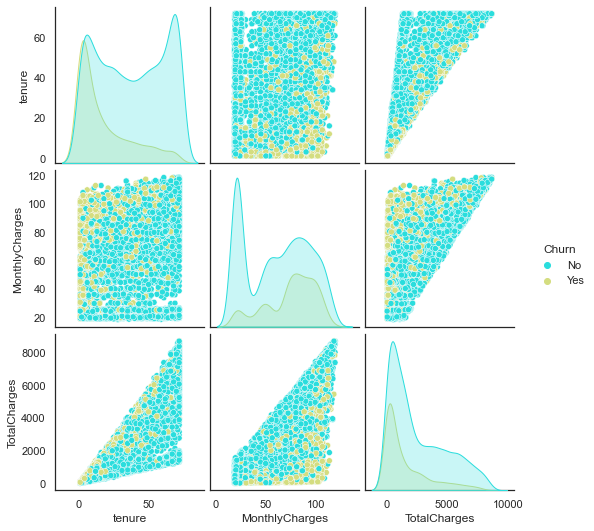

In [30]:
temp_cols = data.drop("SeniorCitizen",axis = 1)
sns.pairplot(temp_cols,hue='Churn',palette='rainbow')

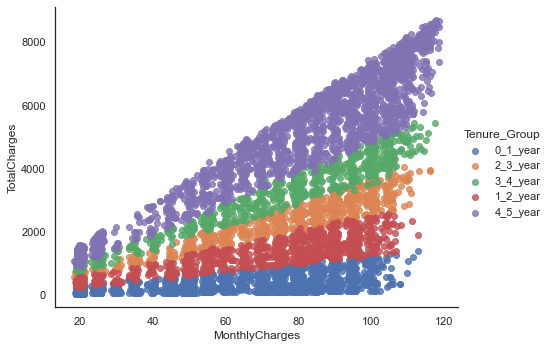

In [31]:
sns.lmplot(x = "MonthlyCharges", y= "TotalCharges", data=data,fit_reg = False,hue = "Tenure_Group",aspect=12/9);

<AxesSubplot:xlabel='Tenure_Group', ylabel='TotalCharges'>

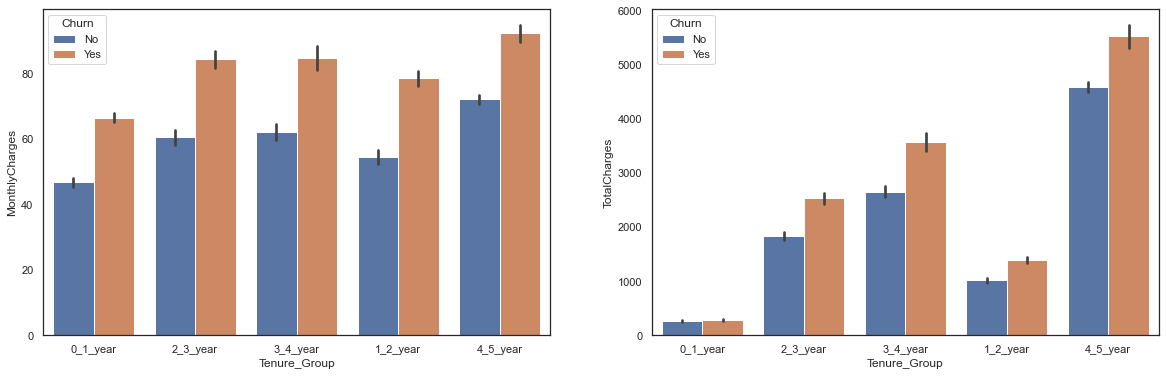

In [32]:
f, axes = plt.subplots( ncols=2, figsize=(20, 6))
sns.barplot(x='Tenure_Group',y='MonthlyCharges',data=data,hue = "Churn",ax = axes[0])
sns.barplot(x='Tenure_Group',y='TotalCharges',data=data,hue = "Churn",ax = axes[1])

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


# DATA PREPROCESSING

In [34]:
cat_cols = [x for x in data.columns if data[x].nunique()<6 and x!="Churn"]
num_cols = [x for x in data.columns if data[x].nunique()>6 and x!="customerID"]
id_customer = data["customerID"]
label = data["Churn"]
label = label.apply(lambda x: 1 if x == "Yes" else 0)

In [35]:
from sklearn.preprocessing import MinMaxScaler

features_log_transformed = pd.DataFrame(data = data[num_cols])
features_log_transformed[num_cols] = data[num_cols].apply(lambda x: np.log(x + 1))

scaler = MinMaxScaler()
features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[num_cols] = scaler.fit_transform(features_log_transformed[num_cols])

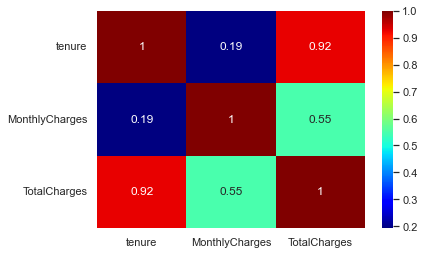

In [36]:
sns.heatmap(features_log_minmax_transform.corr(),annot=True,cmap='jet');

In [37]:
features_log_minmax_transform.drop("tenure",inplace = True, axis = 1)

In [38]:
data.drop(["MonthlyCharges","TotalCharges","tenure"],axis = 1, inplace = True)
data = pd.concat([data, features_log_minmax_transform], axis=1)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [40]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
Tenure_Group        0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [41]:
data.drop("Churn",inplace = True, axis = 1)
data.drop("customerID",inplace = True, axis = 1)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   PhoneService      7032 non-null   object 
 5   MultipleLines     7032 non-null   object 
 6   InternetService   7032 non-null   object 
 7   OnlineSecurity    7032 non-null   object 
 8   OnlineBackup      7032 non-null   object 
 9   DeviceProtection  7032 non-null   object 
 10  TechSupport       7032 non-null   object 
 11  StreamingTV       7032 non-null   object 
 12  StreamingMovies   7032 non-null   object 
 13  Contract          7032 non-null   object 
 14  PaperlessBilling  7032 non-null   object 
 15  PaymentMethod     7032 non-null   object 
 16  Tenure_Group      7032 non-null   object 


In [43]:
data = pd.get_dummies(data = data,columns = cat_cols)

In [44]:
data.head()

,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Group_0_1_year,Tenure_Group_1_2_year,Tenure_Group_2_3_year,Tenure_Group_3_4_year,Tenure_Group_4_5_year
0,0.258016,0.072892,1,0,1,0,0,1,1,0,...,1,0,0,1,0,1,0,0,0,0
1,0.602917,0.749358,0,1,1,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,0.572840,0.280590,0,1,1,0,1,0,1,0,...,1,0,0,0,1,1,0,0,0,0
3,0.443484,0.745063,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0.719396,0.335724,1,0,1,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,0


In [45]:
data_original = pd.concat([data, label,id_customer], axis=1)

In [46]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   MonthlyCharges                           7032 non-null   float64
 1   TotalCharges                             7032 non-null   float64
 2   gender_Female                            7032 non-null   uint8  
 3   gender_Male                              7032 non-null   uint8  
 4   SeniorCitizen_0                          7032 non-null   uint8  
 5   SeniorCitizen_1                          7032 non-null   uint8  
 6   Partner_No                               7032 non-null   uint8  
 7   Partner_Yes                              7032 non-null   uint8  
 8   Dependents_No                            7032 non-null   uint8  
 9   Dependents_Yes                           7032 non-null   uint8  
 10  PhoneService_No                          7032 no

In [47]:
data_original.head()

,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Group_0_1_year,Tenure_Group_1_2_year,Tenure_Group_2_3_year,Tenure_Group_3_4_year,Tenure_Group_4_5_year,Churn,customerID
0,0.258016,0.072892,1,0,1,0,0,1,1,0,...,0,1,0,1,0,0,0,0,0,7590-VHVEG
1,0.602917,0.749358,0,1,1,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,5575-GNVDE
2,0.572840,0.280590,0,1,1,0,1,0,1,0,...,0,0,1,1,0,0,0,0,1,3668-QPYBK
3,0.443484,0.745063,0,1,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,7795-CFOCW
4,0.719396,0.335724,1,0,1,0,1,0,1,0,...,0,1,0,1,0,0,0,0,1,9237-HQITU


# EVALUATION OF ALGORATHIUMS

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.3, random_state = 42)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 4922 samples.
Testing set has 2110 samples.


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve

In [50]:
def apply_classifier(clf,xTrain,xTest,yTrain,yTest):
    
    clf.fit(xTrain, yTrain)
    predictions = clf.predict(xTest)
    conf_mtx = confusion_matrix(yTest,predictions)
    f, axes = plt.subplots(ncols=2, figsize=(15, 5))
    sns.heatmap(conf_mtx,annot=True,cmap='tab20c',cbar = False,fmt = "g",ax = axes[0])
    axes[0].set_xlabel('Predicted labels')
    axes[0].set_ylabel('True labels')
    axes[0].set_title('Confusion Matrix'); 
    axes[0].xaxis.set_ticklabels(['Not Churn', 'Churn']);
    axes[0].yaxis.set_ticklabels(['Not Churn', 'Churn']);

    print("\n Classification report : \n {}".format(classification_report(yTest,predictions)))
    
    roc_auc = roc_auc_score(yTest,predictions) 
    print ("Area under ROC curve : ",roc_auc,"\n")

    fpr, tpr,_ = roc_curve(yTest, predictions)
    axes[1].plot(fpr,tpr,label= "auc="+str(roc_auc));
    axes[1].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")


 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1549
           1       0.49      0.52      0.50       561

    accuracy                           0.73      2110
   macro avg       0.66      0.66      0.66      2110
weighted avg       0.73      0.73      0.73      2110

Area under ROC curve :  0.6621988310553988 



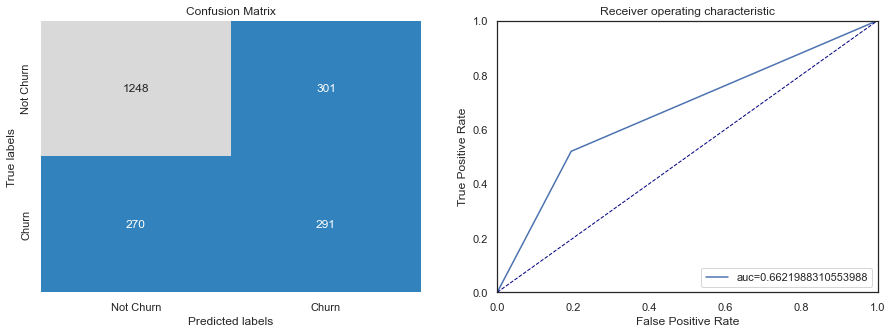

In [51]:
decision_tree = DecisionTreeClassifier(random_state = 42);
apply_classifier(decision_tree,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.52      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

Area under ROC curve :  0.7090032209843852 



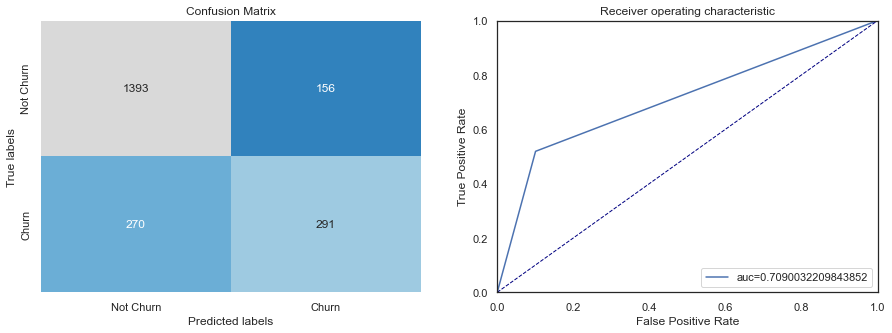

In [52]:
logistic_reg = LogisticRegression(random_state = 42)
apply_classifier(logistic_reg,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1549
           1       0.66      0.44      0.53       561

    accuracy                           0.79      2110
   macro avg       0.74      0.68      0.70      2110
weighted avg       0.78      0.79      0.78      2110

Area under ROC curve :  0.6803624671888828 



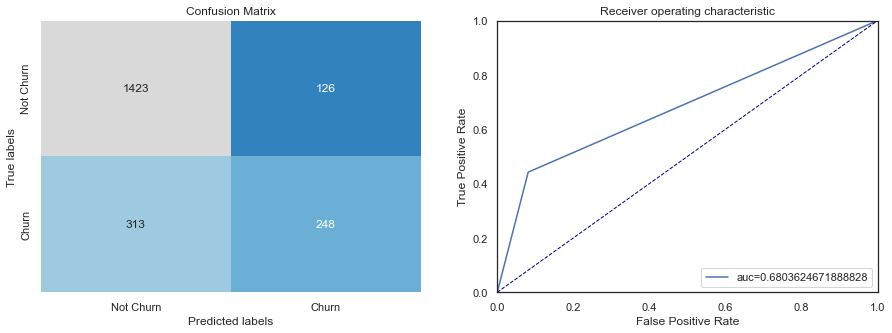

In [53]:
svm_model = SVC(random_state = 42)
apply_classifier(svm_model,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.89      0.86      1549
           1       0.62      0.47      0.53       561

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.70      2110
weighted avg       0.77      0.78      0.77      2110

Area under ROC curve :  0.6829252153939808 



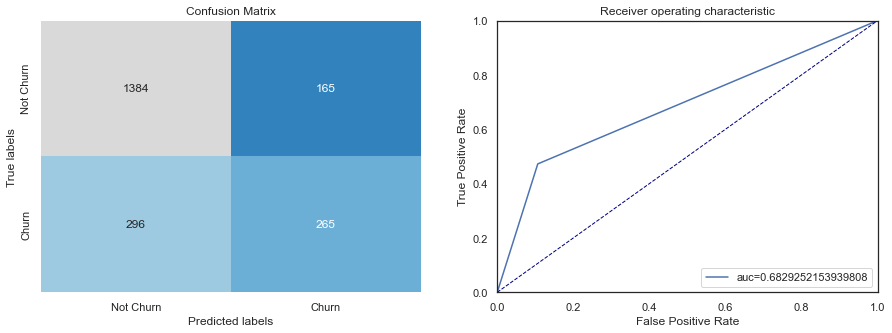

In [54]:
random_forest = RandomForestClassifier(random_state = 42)
apply_classifier(random_forest,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.63      0.53      0.58       561

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.78      0.79      0.79      2110

Area under ROC curve :  0.7103231456324535 



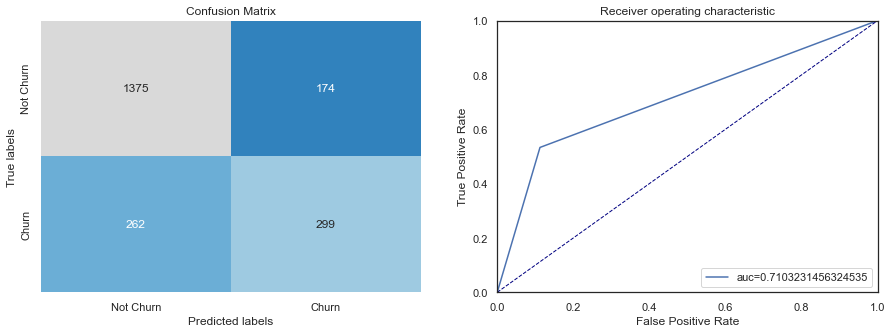

In [55]:
xg_boost = XGBClassifier(random_state = 42)
apply_classifier(xg_boost,X_train, X_test, y_train, y_test)

# TUNING PARAMETERS

In [56]:
Tree_parameters = {"max_depth": [3,4,5,6],
                   "min_samples_leaf":[1,2,3,4]}

LogReg_parameters = {
    "C":[0.25,0.5,0.75,1.0,1.5,2.0,2.5,3.0,4.0,10.0],
    "solver":["newton-cg", "lbfgs", "sag", "saga"],
    "tol":[0.01,0.001,0.0001,0.00001],
    "warm_start":["True","False"]}

SVM_parameters = {
    "C":[1.0,2.0,3.0],
    "cache_size":[100,200],
    "decision_function_shape":['ovo','ovr'],
    "kernel":['sigmoid',"linear"],
    "tol":[0.001,0.0001]}

RandomForest_parameters = {
    "n_estimators" :[10,15,20,25,30], 
    "criterion": ["entropy","gini"],
    "max_depth" : [5,10,15],
    "min_samples_split":[2,4,8,16],
    "max_features":["sqrt","auto","log2"],
    "class_weight" : ["balanced_subsample","balanced"]}

Xgboost_parameters = {"max_depth" : [3,4,5,6],
    "learning_rate" : [0.001,0.0001],
    "booster" : ["gbtree","gblinear","dart"],
    "min_child_weight" : [1,2,3,4]}
                     
                    

In [58]:
from sklearn.model_selection import GridSearchCV

def grid_search(clf,parameters,xTrain,Ytrain):
    
    
    grid_obj = GridSearchCV(clf,parameters,scoring = 'roc_auc',cv = 5)
    grid_fit = grid_obj.fit(xTrain,Ytrain)
    best_clf = grid_fit.best_estimator_

    return best_clf


 Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1549
           1       0.56      0.64      0.60       561

    accuracy                           0.77      2110
   macro avg       0.71      0.73      0.72      2110
weighted avg       0.78      0.77      0.78      2110

Area under ROC curve :  0.7296605595697989 



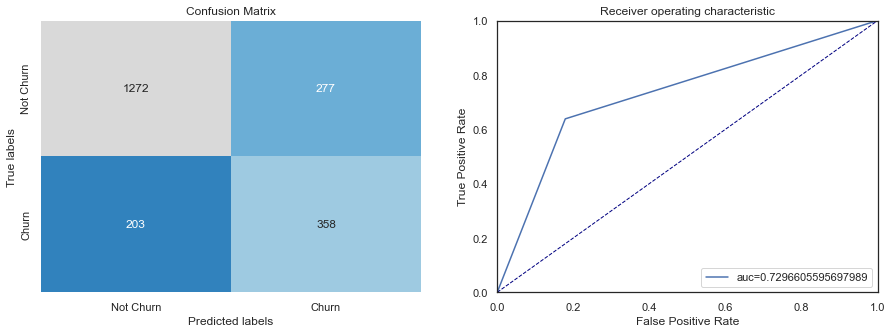

In [59]:
tree_grid = grid_search(decision_tree,Tree_parameters,X_train,y_train);
apply_classifier(tree_grid,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1549
           1       0.65      0.50      0.57       561

    accuracy                           0.80      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110

Area under ROC curve :  0.7032413528824876 



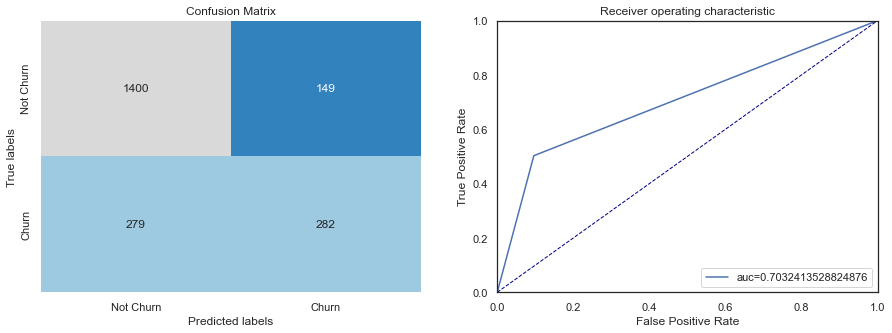

In [60]:
logReg_grid = grid_search(logistic_reg,LogReg_parameters,X_train,y_train);
apply_classifier(logReg_grid,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1549
           1       0.67      0.47      0.55       561

    accuracy                           0.80      2110
   macro avg       0.75      0.69      0.71      2110
weighted avg       0.78      0.80      0.78      2110

Area under ROC curve :  0.6909805532636202 



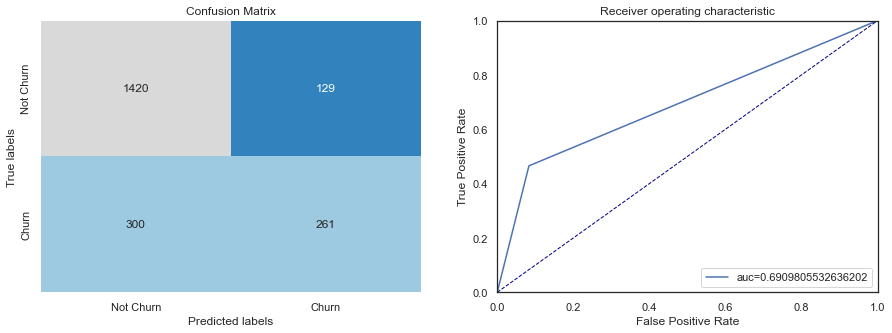

In [61]:
svm_grid = grid_search(svm_model,SVM_parameters,X_train,y_train);
apply_classifier(svm_grid,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1549
           1       0.50      0.78      0.61       561

    accuracy                           0.73      2110
   macro avg       0.70      0.75      0.70      2110
weighted avg       0.79      0.73      0.75      2110

Area under ROC curve :  0.748024428387471 



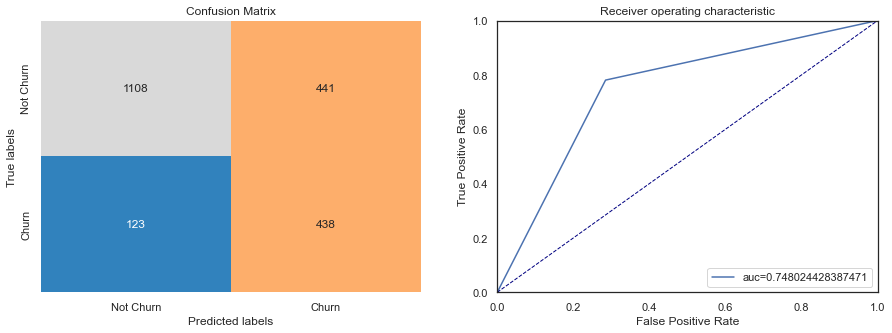

In [62]:
randomForest_grid = grid_search(random_forest,RandomForest_parameters,X_train,y_train);
apply_classifier(randomForest_grid,X_train, X_test, y_train, y_test)

[10:36:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:36:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "ma

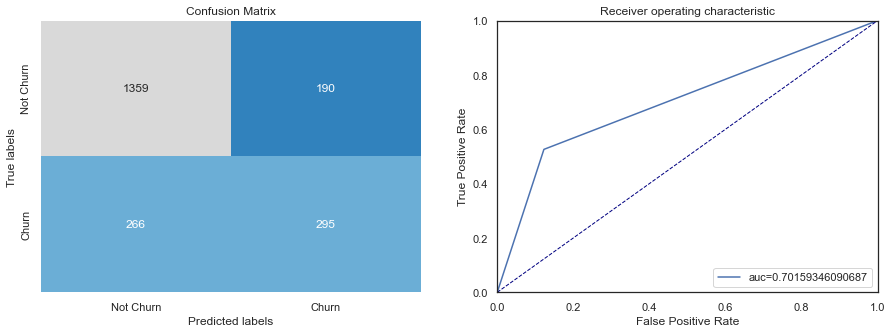

In [63]:
xgBoost_grid = grid_search(xg_boost,Xgboost_parameters,X_train,y_train);
apply_classifier(xgBoost_grid,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1549
           1       0.52      0.79      0.63       561

    accuracy                           0.75      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.80      0.75      0.76      2110

Area under ROC curve :  0.762010221072994 



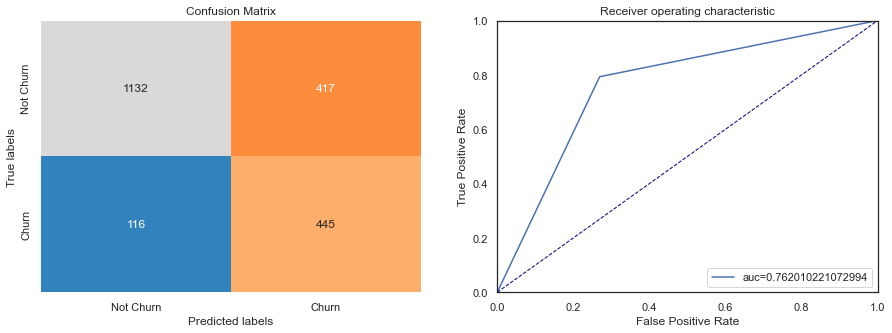

In [64]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(base_estimator = randomForest_grid, n_estimators = 4)
apply_classifier(model,X_train, X_test, y_train, y_test)

# UPSAMPLING

In [65]:
from sklearn.utils import resample

upsample_data = data_original

majority = upsample_data[upsample_data["Churn"]==0]
minority = upsample_data[upsample_data["Churn"]==1]

minority_upsampled = resample(minority, replace=True, n_samples=5163,random_state=42) 
del(upsample_data)
upsample_data = pd.concat([majority,minority_upsampled])

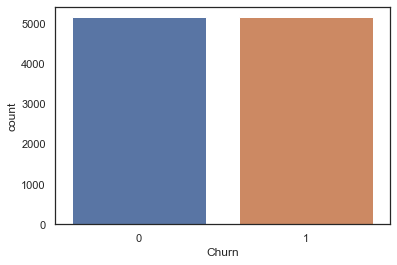

In [66]:
sns.countplot(upsample_data["Churn"]);

In [67]:
id_customer_upsample = upsample_data["customerID"]
label_upsample = upsample_data["Churn"]
upsample_data.drop("Churn",inplace = True, axis = 1)
upsample_data.drop("customerID",inplace = True, axis = 1)

In [69]:
from sklearn.model_selection import train_test_split

X_train_upS, X_test_upS, y_train_upS, y_test_upS = train_test_split(upsample_data, label_upsample, test_size = 0.3, random_state = 42)

print("Training set has {} samples.".format(X_train_upS.shape[0]))
print("Testing set has {} samples.".format(X_test_upS.shape[0]))

Training set has 7228 samples.
Testing set has 3098 samples.



 Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.80      0.86      1571
           1       0.82      0.93      0.87      1527

    accuracy                           0.87      3098
   macro avg       0.87      0.87      0.86      3098
weighted avg       0.87      0.87      0.86      3098

Area under ROC curve :  0.8663465638869541 



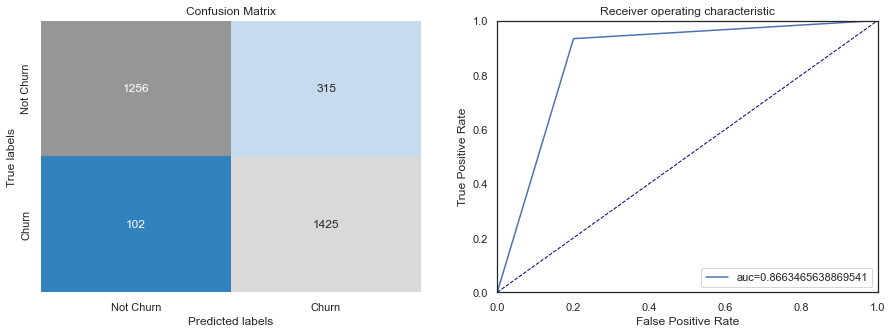

In [70]:
decision_tree = DecisionTreeClassifier(random_state = 42);
apply_classifier(decision_tree,X_train_upS, X_test_upS, y_train_upS, y_test_upS)


 Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.73      0.76      1571
           1       0.74      0.81      0.78      1527

    accuracy                           0.77      3098
   macro avg       0.77      0.77      0.77      3098
weighted avg       0.77      0.77      0.77      3098

Area under ROC curve :  0.7691693793490979 



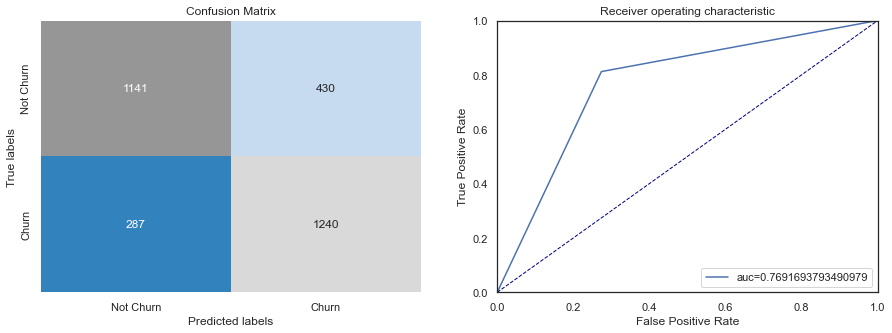

In [71]:
logistic_reg = LogisticRegression(random_state = 42)
apply_classifier(logistic_reg,X_train_upS, X_test_upS, y_train_upS, y_test_upS)


 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.75      0.79      1571
           1       0.76      0.84      0.80      1527

    accuracy                           0.79      3098
   macro avg       0.80      0.79      0.79      3098
weighted avg       0.80      0.79      0.79      3098

Area under ROC curve :  0.7940612367997727 



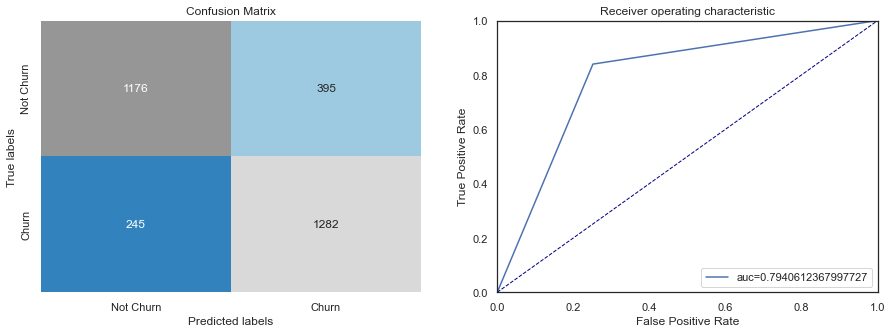

In [72]:
svm_model = SVC(random_state = 42)
apply_classifier(svm_model,X_train_upS, X_test_upS, y_train_upS, y_test_upS)


 Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.83      0.89      1571
           1       0.85      0.95      0.90      1527

    accuracy                           0.89      3098
   macro avg       0.90      0.89      0.89      3098
weighted avg       0.90      0.89      0.89      3098

Area under ROC curve :  0.8914191278814565 



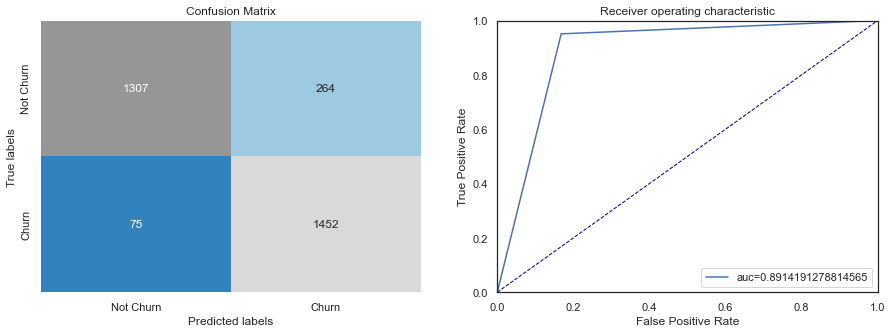

In [73]:
random_forest = RandomForestClassifier(random_state = 42)
apply_classifier(random_forest,X_train_upS, X_test_upS, y_train_upS, y_test_upS)


 Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.80      0.85      1571
           1       0.81      0.91      0.86      1527

    accuracy                           0.85      3098
   macro avg       0.86      0.85      0.85      3098
weighted avg       0.86      0.85      0.85      3098

Area under ROC curve :  0.8549503796921694 



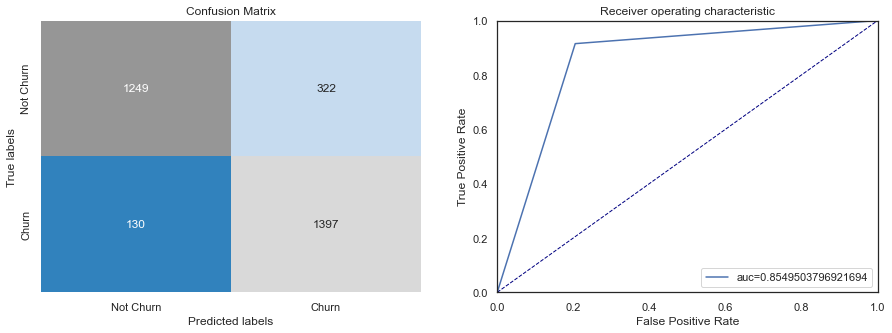

In [74]:
xg_boost = XGBClassifier(random_state = 42)
apply_classifier(xg_boost,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

# FINAL MODEL


 Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.83      0.89      1571
           1       0.84      0.95      0.90      1527

    accuracy                           0.89      3098
   macro avg       0.90      0.89      0.89      3098
weighted avg       0.90      0.89      0.89      3098

Area under ROC curve :  0.8921106899488394 



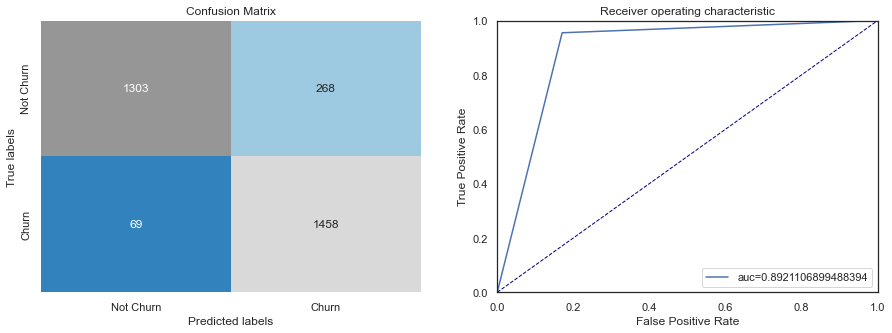

In [75]:
model = AdaBoostClassifier(base_estimator = random_forest, n_estimators = 4)
apply_classifier(model,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

<AxesSubplot:xlabel='feature'>

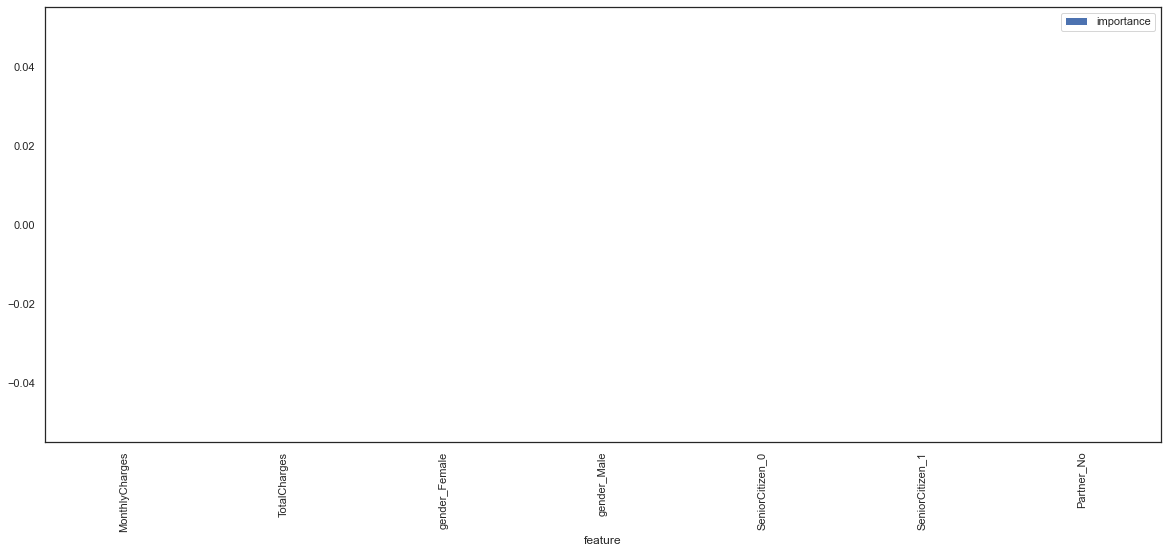

In [76]:
importances = pd.DataFrame({'feature':data.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances[0:7].plot.bar(figsize=(20, 8))